In [948]:
import pandas as pd

In [949]:
df= pd.read_csv('cancat_Update_DS.csv')

In [950]:
df.head()

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,Southern,Monaragala,Katharagama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults
1,2,Southern,Monaragala,Thanamalvila,2010-01-07,Unknown,Male,20,Subadults and adults
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults
3,4,Eastern,Ampara,Thirukkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults
4,5,North Western,Kurunegala,Ipalogama,2010-01-15,Accident,Male,5,Juvenile


In [951]:
import re
def convert_to_years(age_str):
    if isinstance(age_str, str):
        if re.match(r'^\d+(\.\d+)? Months?$', age_str):
            months = float(re.match(r'^\d+(\.\d+)?', age_str).group())
            return months / 12  
        elif re.match(r'^\d+ Weeks?$', age_str):
            weeks = int(re.match(r'^\d+', age_str).group())
            return weeks / 52 
        elif re.match(r'^\d+ Days?$', age_str):
            days = int(re.match(r'^\d+', age_str).group())
            return days / 365 
        elif '-' in age_str:
            age_range = age_str.split('-')
            try:
                return (float(age_range[0]) + float(age_range[1])) / 2  
            except ValueError:
                return None  
    try:
        return float(age_str)
    except ValueError:
        return None  

df['Age'] = df['Age'].apply(convert_to_years)

In [952]:
df.isna().sum()

No                  0
Region              0
District            0
D/S Office          0
Date of Death       0
Cause of Death      0
Sex                 0
Age               157
Age Category        0
dtype: int64

In [953]:
df.isna().sum()

No                  0
Region              0
District            0
D/S Office          0
Date of Death       0
Cause of Death      0
Sex                 0
Age               157
Age Category        0
dtype: int64

In [954]:
df['Cause of Death'].value_counts()

Cause of Death
Unknown                  456
Gunshot                  403
Hakkapatas               299
Electrocuted             169
Natural                   87
Accident                  77
Train Accident            76
Poisned                   71
Other                     67
Injured                   45
Body destroyed            40
Disease                   21
Fallen into well          15
Septicemia                13
Land mine                 10
Attack by an elephant     10
Flood                      6
Drowned                    6
Eaten polythene            6
Lightning                  4
Broken the Spinal          3
At born                    3
Falling of a mountain      2
Garbage consumption        1
Liver floot                1
Severe hemorrhage          1
Nivukeniya                 1
Drought                    1
Name: count, dtype: int64

In [955]:
# Create a mapping of causes to common categories
cause_mapping = {
    'Unknown': 'Unknown',
    'Gunshot': 'Human-Induced',
    'Hakkapatas': 'Human-Induced',
    'Electrocuted': 'Human-Induced',
    'Natural': 'Natural',
    'Accident': 'Accident',
    'Train Accident': 'Accident',
    'Poisned': 'Human-Induced',
    'Other': 'Other',
    'Injured': 'Other',
    'Body destroyed': 'Unknown',
    'Disease': 'Environmental',
    'Fallen into well': 'Environmental',
    'Septicemia': 'Environmental',
    'Land mine': 'Human-Induced',
    'Attack by an elephant': 'Environmental',
    'Flood': 'Environmental',
    'Drowned': 'Environmental',
    'Eaten polythene': 'Other',
    'Lightning': 'Environmental',
    'Broken the Spinal': 'Other',
    'At born': 'Natural',
    'Falling of a mountain': 'Environmental',
    'Garbage consumption': 'Other',
    'Liver floot': 'Environmental',
    'Severe hemorrhage': 'Other',
    'Nivukeniya': 'Environmental',
    'Drought': 'Environmental'
}

# Load the dataset
# (Assuming you already have this loaded)

# Apply the mapping to create a new 'Common Cause' column
df['Common Cause'] = df['Cause of Death'].map(cause_mapping)

In [956]:
df=df[df['Common Cause']!='Unknown']

In [957]:
df

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category,Common Cause
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,32.5,Subadults and adults,Human-Induced
3,4,Eastern,Ampara,Thirukkovil,2010-01-12,Gunshot,Female,17.5,Subadults and adults,Human-Induced
4,5,North Western,Kurunegala,Ipalogama,2010-01-15,Accident,Male,5.0,Juvenile,Accident
5,6,North Western,Kurunegala,Pannala,2010-01-16,Gunshot,Male,37.5,Subadults and adults,Human-Induced
7,8,North Western,Puttalam,Puttalam,2010-01-20,Gunshot,Male,7.0,Juvenile,Human-Induced
...,...,...,...,...,...,...,...,...,...,...
1887,1888,Wayamba,Kurunegala,Giribawa,2017-12-27,Hakkapatas,Female,2.0,Calf,Human-Induced
1888,1889,Eastern,Ampara,Addalachchenai,2017-12-28,Eaten polythene,Male,13.5,Subadults and adults,Other
1889,1890,Elephant Transit Home,Ratnapura,Ratnapura,2017-12-28,Natural,Female,NaN,Unknown,Natural
1892,1893,Trincomalee,Trincomalee,Kantalai,2017-12-29,Electrocuted,Unknown,27.5,Subadults and adults,Human-Induced


In [958]:
df.columns

Index(['No', 'Region', 'District', 'D/S Office', 'Date of Death',
       'Cause of Death', 'Sex', 'Age', 'Age Category', 'Common Cause'],
      dtype='object')

In [959]:
selected_variables = df[['Common Cause', 'District', 'Sex',"Age Category"]]
selected_variables = pd.get_dummies(selected_variables, columns=[ 'District', 'Sex','Age Category'],dtype=int)

In [960]:
selected_variables

,Common Cause,District_Ampara,District_Anuradhapura,District_Badulla,District_Batticaloa,District_Hambantota,District_Kandy,District_Kilinochchi,District_Kurunegala,District_Mannar,...,District_Vavuniya,Sex_Calf,Sex_Female,Sex_Male,Sex_Unknown,Age Category_Calf,Age Category_Infant,Age Category_Juvenile,Age Category_Subadults and adults,Age Category_Unknown
2,Human-Induced,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,Human-Induced,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,Accident,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
5,Human-Induced,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
7,Human-Induced,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,Human-Induced,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1888,Other,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1889,Natural,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1892,Human-Induced,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [961]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x=selected_variables.drop(['Common Cause'],axis=1)
y=selected_variables['Common Cause']
 

In [962]:
x

,District_Ampara,District_Anuradhapura,District_Badulla,District_Batticaloa,District_Hambantota,District_Kandy,District_Kilinochchi,District_Kurunegala,District_Mannar,District_Matale,...,District_Vavuniya,Sex_Calf,Sex_Female,Sex_Male,Sex_Unknown,Age Category_Calf,Age Category_Infant,Age Category_Juvenile,Age Category_Subadults and adults,Age Category_Unknown
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1888,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1889,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1021]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,stratify=y)

In [1015]:
x_train

,District_Ampara,District_Anuradhapura,District_Badulla,District_Batticaloa,District_Hambantota,District_Kandy,District_Kilinochchi,District_Kurunegala,District_Mannar,District_Matale,...,District_Vavuniya,Sex_Calf,Sex_Female,Sex_Male,Sex_Unknown,Age Category_Calf,Age Category_Infant,Age Category_Juvenile,Age Category_Subadults and adults,Age Category_Unknown
960,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1327,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1759,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1631,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
11,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [1009]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

In [1022]:
y_train.value_counts()

Common Cause
Human-Induced    761
Accident         122
Other             99
Natural           72
Environmental     64
Name: count, dtype: int64

In [967]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
1,-0.389089,-0.449612,-0.138359,4.199206,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
2,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
3,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,-0.264304,-0.202406,-0.448173,-1.396377,3.729164
4,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,-1.396377,3.729164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,-1.396377,3.729164
1114,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,3.676885,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,3.783526,-0.202406,-0.448173,-1.396377,-0.268157
1115,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
1116,2.570105,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,-0.264304,-0.202406,2.231280,-1.396377,-0.268157


In [968]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train,y_train)
y_pred= model_svc.predict(x_test)

In [969]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6857142857142857


In [970]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,zero_division=0))

               precision    recall  f1-score   support

     Accident       0.18      0.06      0.10        31
Environmental       0.00      0.00      0.00        16
Human-Induced       0.71      0.96      0.82       191
      Natural       1.00      0.28      0.43        18
        Other       0.50      0.04      0.08        24

     accuracy                           0.69       280
    macro avg       0.48      0.27      0.28       280
 weighted avg       0.61      0.69      0.60       280



In [971]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
model_dt.fit(x_train,y_train)
y_pred=model_dt.predict(x_test)

In [972]:
accuracy_score(y_test,y_pred)

0.21071428571428572

In [973]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

     Accident       0.14      0.77      0.24        31
Environmental       0.06      0.19      0.10        16
Human-Induced       0.67      0.14      0.23       191
      Natural       0.23      0.33      0.27        18
        Other       0.00      0.00      0.00        24

     accuracy                           0.21       280
    macro avg       0.22      0.29      0.17       280
 weighted avg       0.49      0.21      0.20       280



c:\Users\ravindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ravindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ravindu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [974]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_pred=model_rf.predict(x_test)

In [975]:
accuracy_score(y_test,y_pred)

0.6607142857142857

In [976]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

     Accident       0.14      0.06      0.09        31
Environmental       0.00      0.00      0.00        16
Human-Induced       0.73      0.93      0.82       191
      Natural       0.62      0.28      0.38        18
        Other       0.12      0.04      0.06        24

     accuracy                           0.66       280
    macro avg       0.32      0.26      0.27       280
 weighted avg       0.56      0.66      0.60       280



In [977]:
from sklearn.ensemble import AdaBoostClassifier
model_ada= AdaBoostClassifier(learning_rate=0.01)
model_ada.fit(x_train,y_train)
y_pred=model_ada.predict(x_test)


In [978]:
accuracy_score(y_test,y_pred)

0.6964285714285714

In [979]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
1,-0.389089,-0.449612,-0.138359,4.199206,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
2,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
3,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,-0.264304,-0.202406,-0.448173,-1.396377,3.729164
4,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,-1.396377,3.729164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,-1.396377,3.729164
1114,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,3.676885,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,3.783526,-0.202406,-0.448173,-1.396377,-0.268157
1115,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
1116,2.570105,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,-0.264304,-0.202406,2.231280,-1.396377,-0.268157


In [980]:
y_train.value_counts()

Common Cause
Human-Induced    761
Accident         122
Other             99
Natural           72
Environmental     64
Name: count, dtype: int64

In [981]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [982]:
y_train_res.value_counts()

Common Cause
Environmental    761
Other            761
Accident         761
Human-Induced    761
Natural          761
Name: count, dtype: int64

In [983]:
from tensorflow import keras
model = keras. Sequential([
    keras.layers. Dense (32, input_dim=28, activation='relu'), 
    keras.layers. Dense(16, activation = 'relu'), 
    keras.layers.Dropout(0.3), 
    keras.layers. Dense(8, activation='relu'), 
    keras.layers. Dense(5, activation = 'softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [984]:
y_train_enc=pd.get_dummies(y_train,dtype=int)

In [985]:
y_train_enc

,Accident,Environmental,Human-Induced,Natural,Other
1829,0,1,0,0,0
551,0,0,0,0,1
1503,1,0,0,0,0
1693,0,0,1,0,0
1124,0,0,0,1,0
...,...,...,...,...,...
688,0,0,0,1,0
359,1,0,0,0,0
1100,0,0,1,0,0
1405,0,0,1,0,0


In [986]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
1,-0.389089,-0.449612,-0.138359,4.199206,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
2,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
3,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,-0.264304,-0.202406,-0.448173,-1.396377,3.729164
4,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,-1.396377,3.729164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,-1.396377,3.729164
1114,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,3.676885,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,3.783526,-0.202406,-0.448173,-1.396377,-0.268157
1115,-0.389089,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,-0.668067,0.719000,-0.171656,-0.264304,-0.202406,-0.448173,0.716139,-0.268157
1116,2.570105,-0.449612,-0.138359,-0.238140,-0.216371,-0.079377,-0.051871,-0.271969,-0.134963,-0.141679,...,-0.190117,-0.059922,1.496857,-1.390821,-0.171656,-0.264304,-0.202406,2.231280,-1.396377,-0.268157


In [987]:
history = model.fit(x_train,y_train_enc,epochs=500,validation_split=0.2)

Epoch 1/500
28/28 [==============================] - 4s 18ms/step - loss: 1.5509 - accuracy: 0.2640 - val_loss: 1.4277 - val_accuracy: 0.4152
Epoch 2/500
28/28 [==============================] - 0s 3ms/step - loss: 1.3916 - accuracy: 0.5414 - val_loss: 1.2917 - val_accuracy: 0.6205
Epoch 3/500
28/28 [==============================] - 0s 3ms/step - loss: 1.2541 - accuracy: 0.6510 - val_loss: 1.1233 - val_accuracy: 0.7009
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 1.1377 - accuracy: 0.6779 - val_loss: 1.0217 - val_accuracy: 0.7009
Epoch 5/500
28/28 [==============================] - 0s 4ms/step - loss: 1.0598 - accuracy: 0.6745 - val_loss: 0.9748 - val_accuracy: 0.7009
Epoch 6/500
28/28 [==============================] - 0s 3ms/step - loss: 1.0583 - accuracy: 0.6756 - val_loss: 0.9511 - val_accuracy: 0.7009
Epoch 7/500
28/28 [==============================] - 0s 3ms/step - loss: 1.0140 - accuracy: 0.6723 - val_loss: 0.9279 - val_accuracy: 0.7054
Epoch 8/500


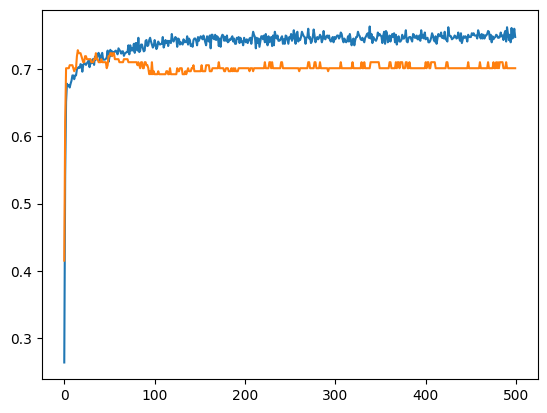

In [988]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

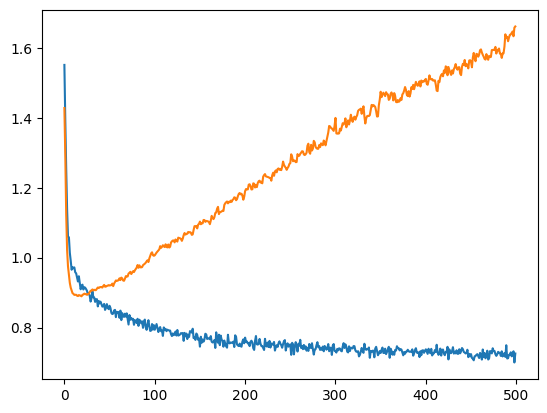

In [989]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [844]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.401192,-0.442405,-0.141679,-0.242306,-0.195112,-0.073455,-0.051871,-0.270068,-0.148114,-0.151238,...,-0.192629,-0.073455,-0.659677,0.719000,-0.182405,-0.266235,-0.204789,-0.433702,0.706158,-0.270068
1,-0.401192,-0.442405,-0.141679,-0.242306,-0.195112,-0.073455,-0.051871,-0.270068,-0.148114,-0.151238,...,-0.192629,-0.073455,-0.659677,0.719000,-0.182405,-0.266235,-0.204789,-0.433702,0.706158,-0.270068
2,2.492570,-0.442405,-0.141679,-0.242306,-0.195112,-0.073455,-0.051871,-0.270068,-0.148114,-0.151238,...,-0.192629,-0.073455,-0.659677,0.719000,-0.182405,-0.266235,-0.204789,-0.433702,0.706158,-0.270068
3,-0.401192,-0.442405,-0.141679,-0.242306,-0.195112,-0.073455,-0.051871,3.702773,-0.148114,-0.151238,...,-0.192629,-0.073455,-0.659677,0.719000,-0.182405,-0.266235,-0.204789,-0.433702,0.706158,-0.270068
4,-0.401192,-0.442405,-0.141679,-0.242306,5.125260,-0.073455,-0.051871,-0.270068,-0.148114,-0.151238,...,-0.192629,-0.073455,-0.659677,0.719000,-0.182405,-0.266235,-0.204789,-0.433702,0.706158,-0.270068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,-0.401192,-0.442405,-0.141679,-0.242306,-0.195112,-0.073455,-0.051871,-0.270068,-0.148114,-0.151238,...,-0.192629,-0.073455,-0.659677,0.719000,-0.182405,-0.266235,-0.204789,-0.433702,0.706158,-0.270068
276,-0.401192,-0.442405,-0.141679,4.127016,-0.195112,-0.073455,-0.051871,-0.270068,-0.148114,-0.151238,...,-0.192629,-0.073455,-0.659677,0.719000,-0.182405,-0.266235,-0.204789,-0.433702,0.706158,-0.270068
277,-0.401192,-0.442405,-0.141679,-0.242306,-0.195112,-0.073455,-0.051871,-0.270068,-0.148114,-0.151238,...,-0.192629,-0.073455,-0.659677,0.719000,-0.182405,-0.266235,-0.204789,2.305729,-1.416113,-0.270068
278,-0.401192,-0.442405,-0.141679,4.127016,-0.195112,-0.073455,-0.051871,-0.270068,-0.148114,-0.151238,...,-0.192629,-0.073455,-0.659677,0.719000,-0.182405,-0.266235,-0.204789,-0.433702,0.706158,-0.270068


In [990]:
y_test.value_counts()

Common Cause
Human-Induced    191
Accident          31
Other             24
Natural           18
Environmental     16
Name: count, dtype: int64

In [991]:
y_pred=model.predict(x_test)

9/9 [==============================] - 0s 4ms/step


In [992]:
import numpy as np

In [993]:

y_pred=np.argmax(y_pred,axis=-1)

In [995]:
y_pred

array([2, 4, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2], dtype=int64)

In [996]:
y_pred_enc=pd.get_dummies(y_pred,dtype=int)
y_test_enc=pd.get_dummies(y_test,dtype=int)

In [997]:
y_test_enc

,Accident,Environmental,Human-Induced,Natural,Other
500,0,0,1,0,0
237,0,1,0,0,0
205,0,0,1,0,0
1531,0,1,0,0,0
1374,0,0,0,0,1
...,...,...,...,...,...
1113,0,0,1,0,0
35,0,0,0,0,1
111,0,0,0,1,0
929,0,0,1,0,0


In [998]:
y_pred_enc

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
275,0,0,1,0,0
276,0,0,0,1,0
277,0,0,1,0,0
278,0,0,1,0,0


In [999]:
print(accuracy_score(y_test_enc,y_pred_enc))

0.65
